In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from cleaning import clean
from explore import show_wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
from explore import question_viz
from wordcloud import WordCloud, STOPWORDS
from classification import distribution_check
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/yusufolodo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


## CLEANING DATA

In [2]:
kick = pd.read_csv("ks-projects-201801.csv")

clean the dataset by passing the function

In [3]:
clean(kick)

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,number_of_days,pledged_goal_diff,classes_state
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.00,1533.95,58,-1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.00,30000.00,59,-27579.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.00,45000.00,44,-44780.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.00,5000.00,29,-4999.00,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.00,50000.00,34,2375.00,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01 18:30:44,successful,16,US,1205.00,1000.00,19,205.00,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,2016-02-01 20:05:12,failed,40,US,453.00,25000.00,44,-24547.00,0
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2013-09-09 18:19:37,failed,0,CA,0.00,2406.39,29,-2406.39,0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09 06:42:58,successful,100,US,12700.00,12500.00,29,200.00,1
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,2014-09-02 17:11:50,failed,0,US,0.00,5000.00,29,-5000.00,0


## BUSINESS QUESTIONS AND VISUALIZATION

Q1. Which categories have the most successful number of projects and 
    which categories have the most failed number of projects based on counts and percentage?
    The client is not interested in categories of projects which has less than 2500
    counts as they want a wide range of data to base their decisions on.


According to the plot below, product deign has the 
    highest number of successful projects, followed closely by table
    top games and then shorts in third.


The plot below shows that product design is 
    also the category that has failed the most followed by documentary
    and food in second and third place.Now that we know the counts of 
    each category with regards to failure and success, 
    what to calculate next is the percentage of success and failure divided by the outcomes of the whole projects


For the top 10 project most success rates and least success rates:


Clearly from the plot below the most success 
    rates for the category of a project i

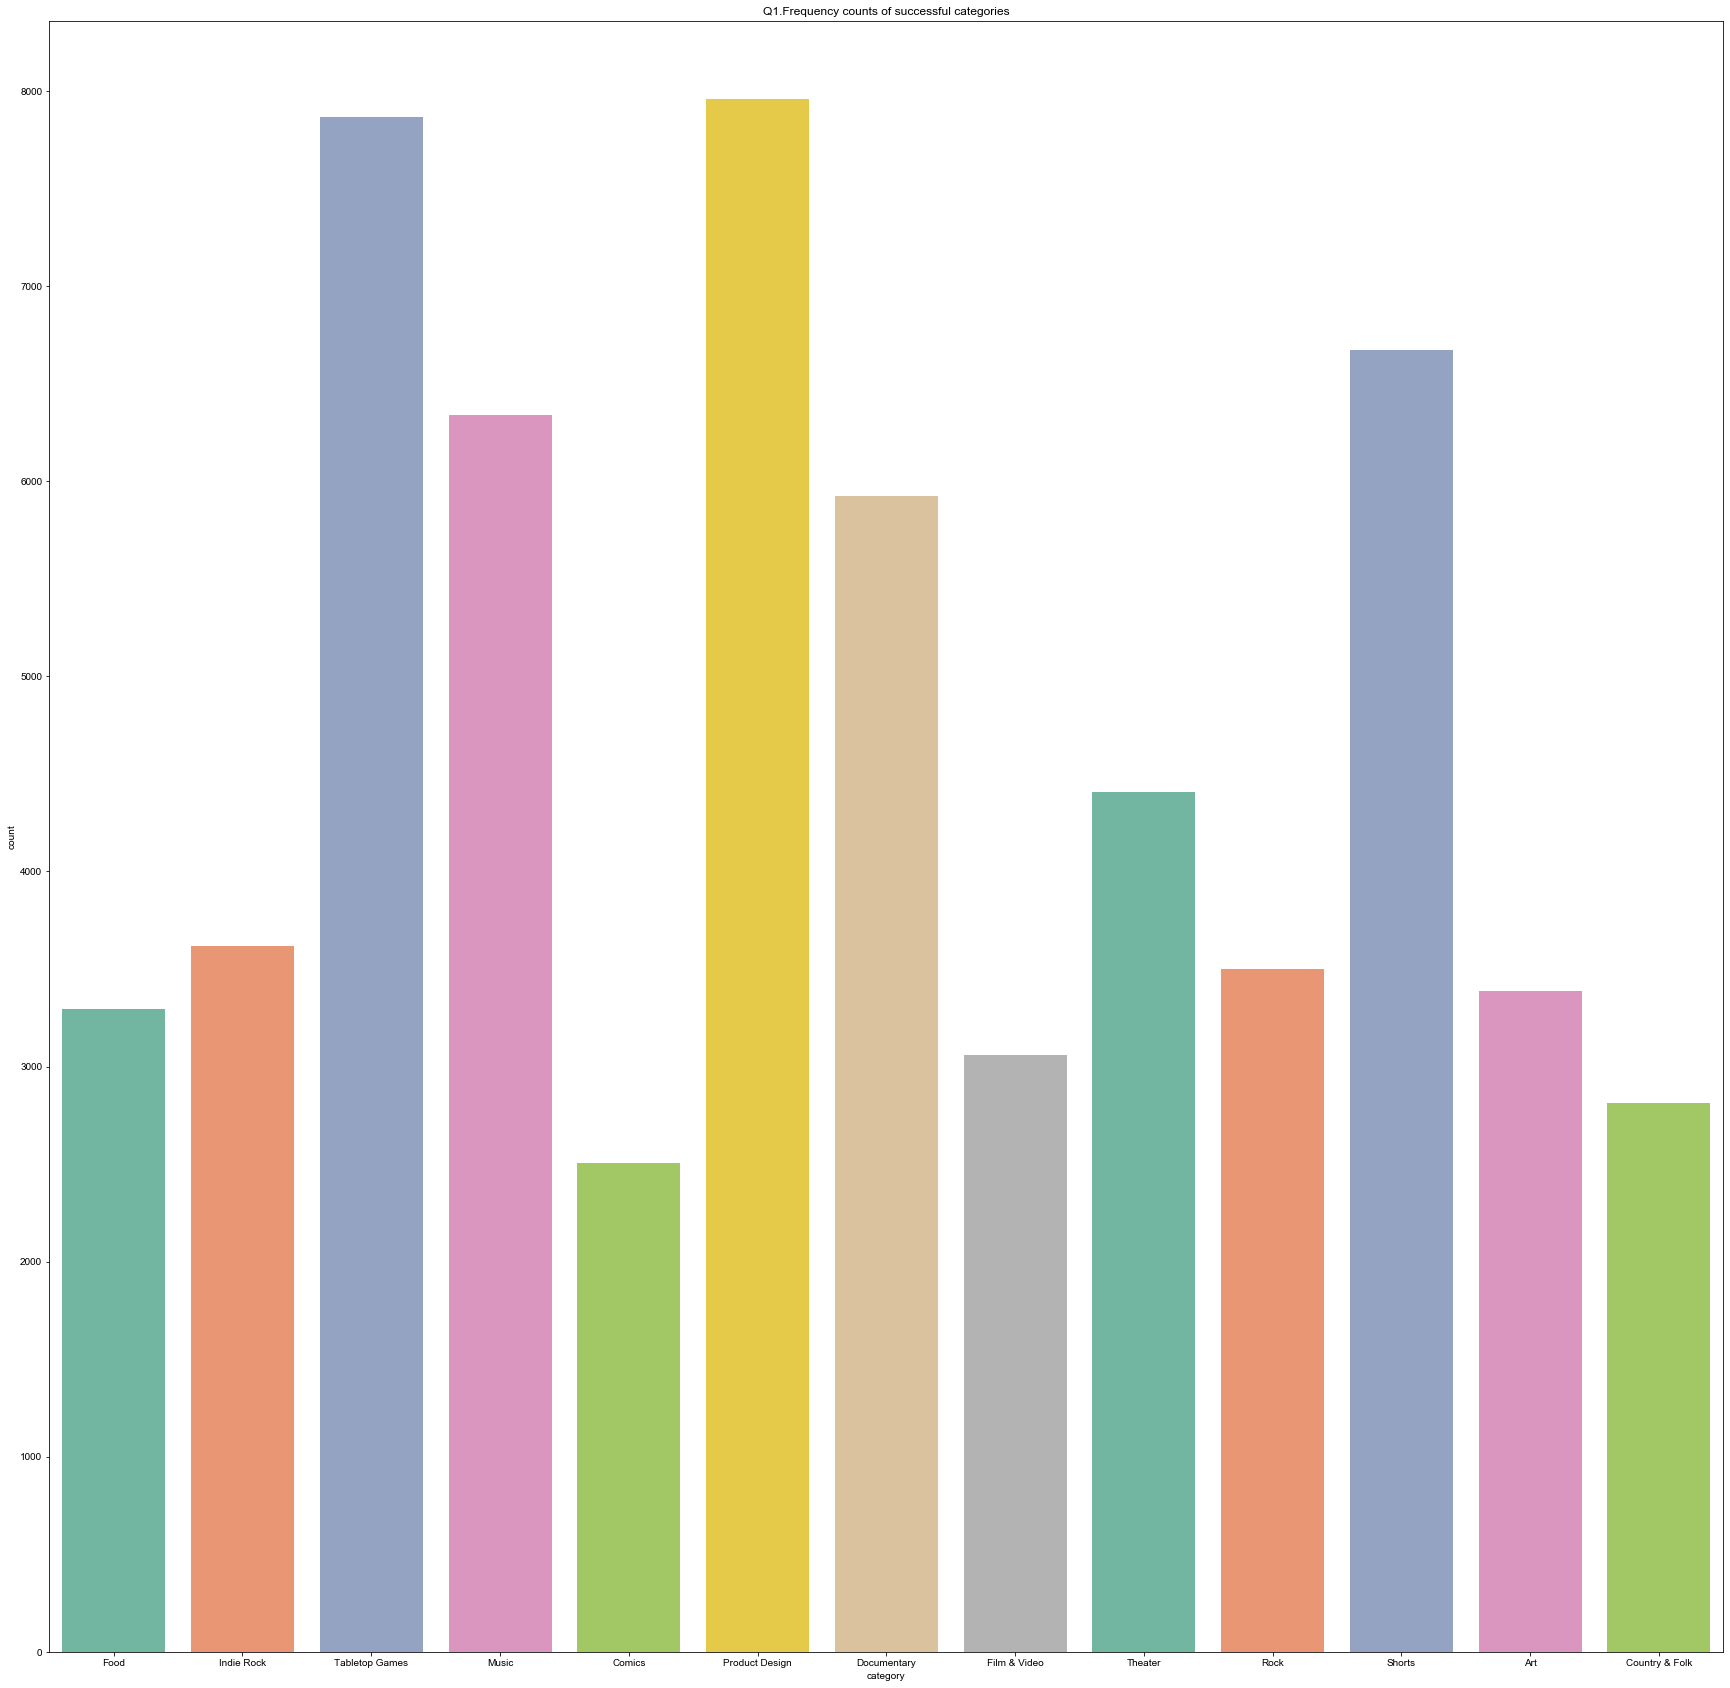

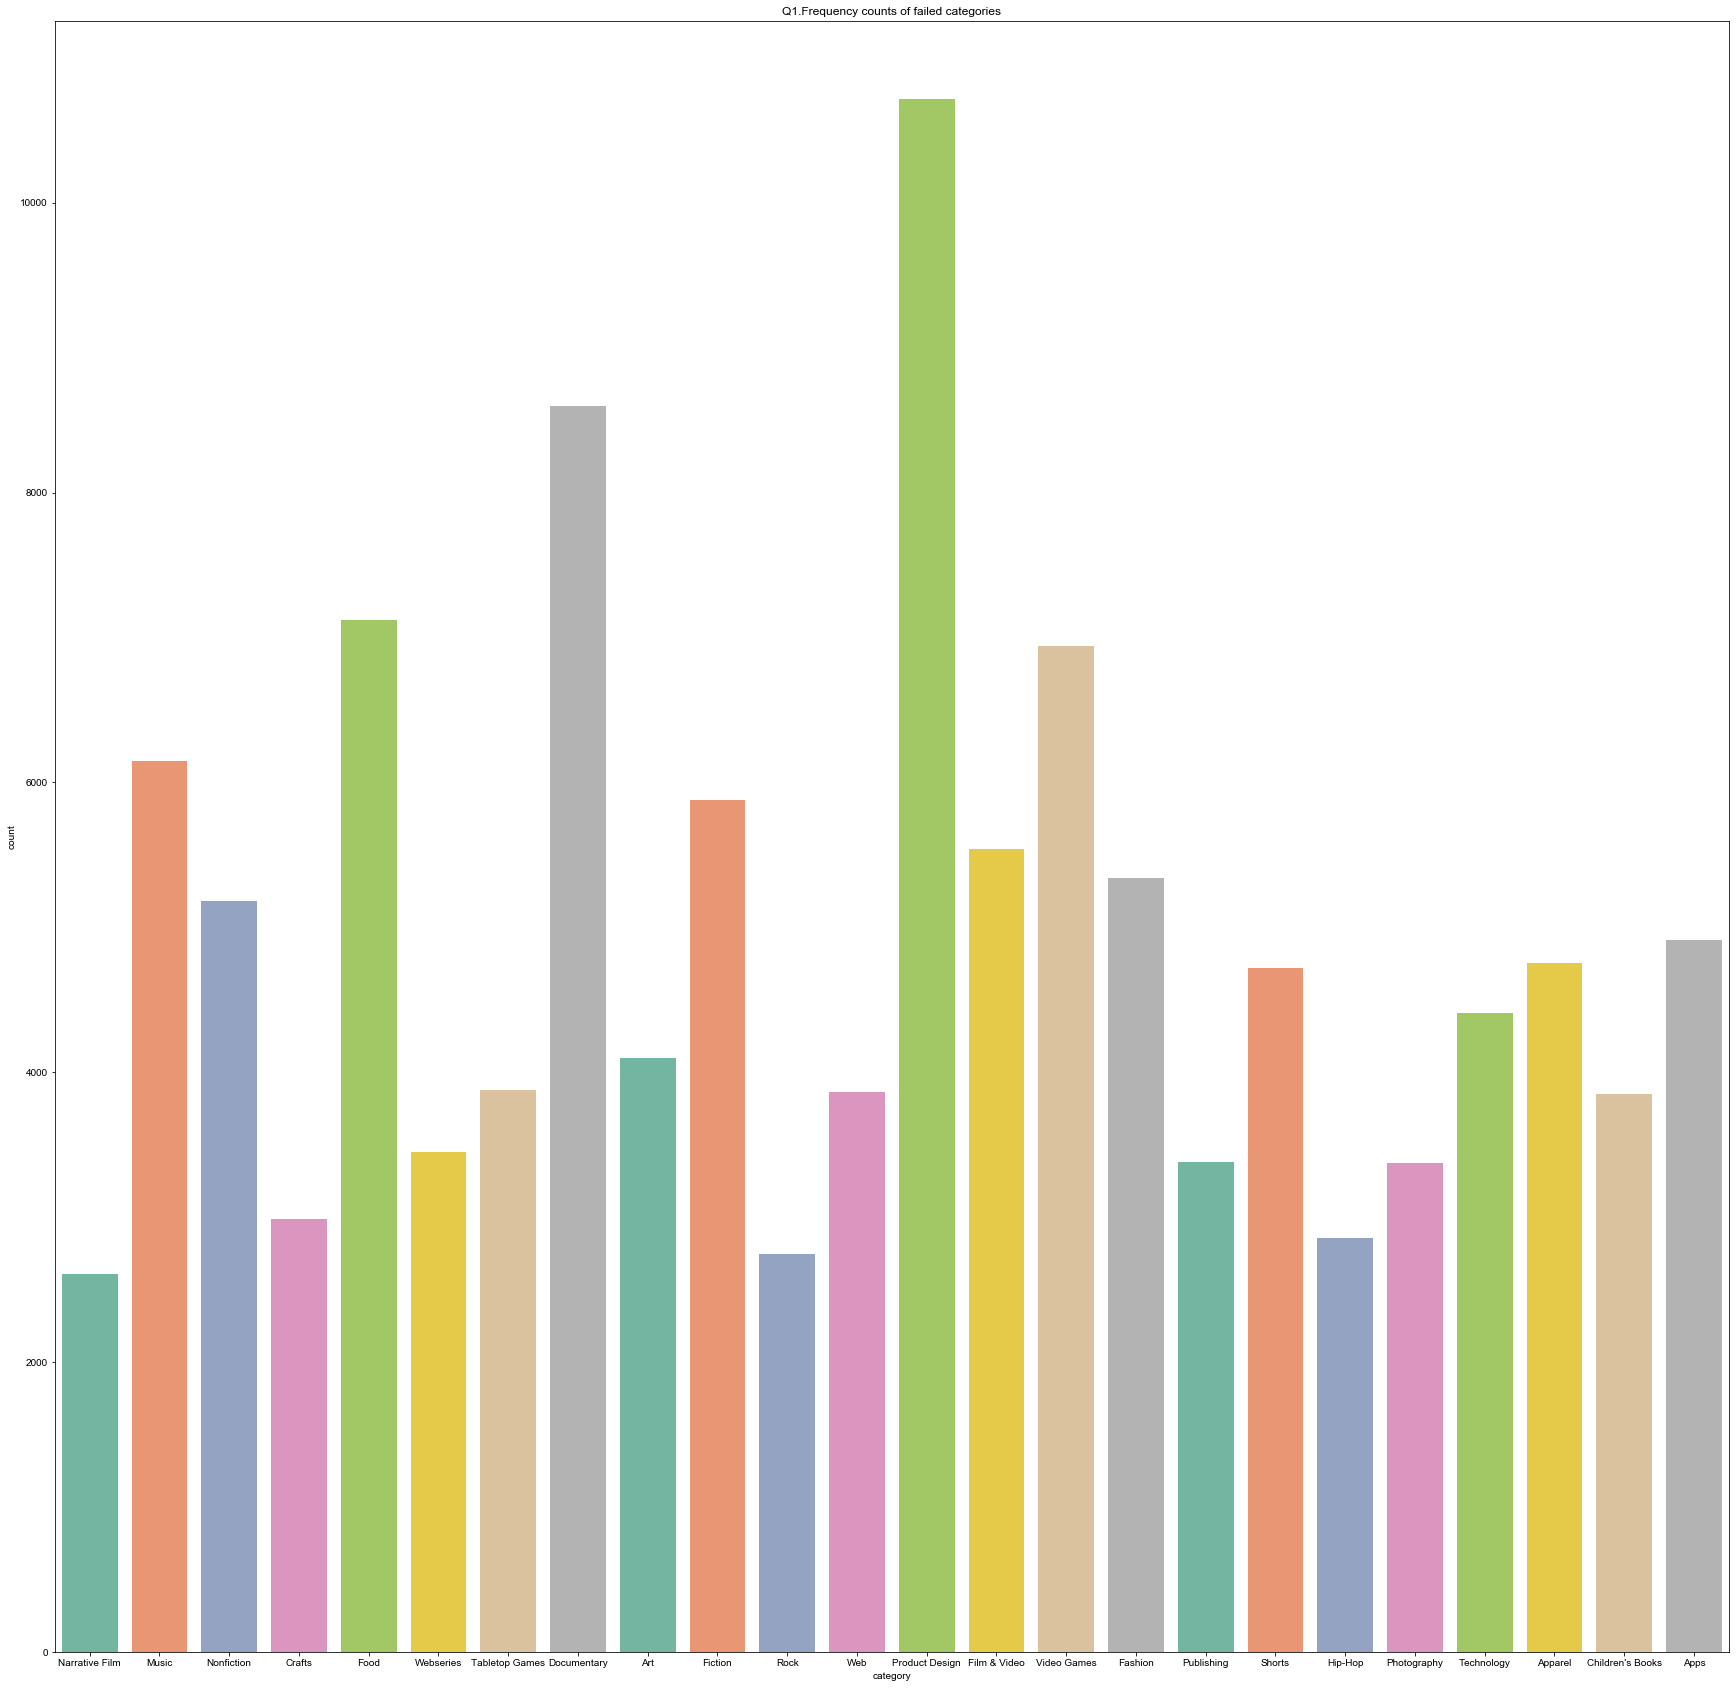

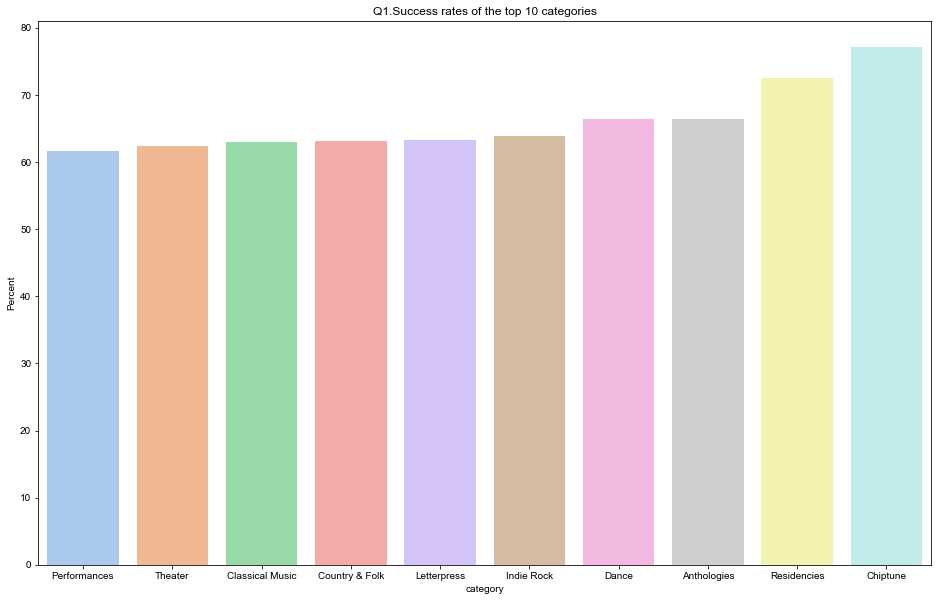

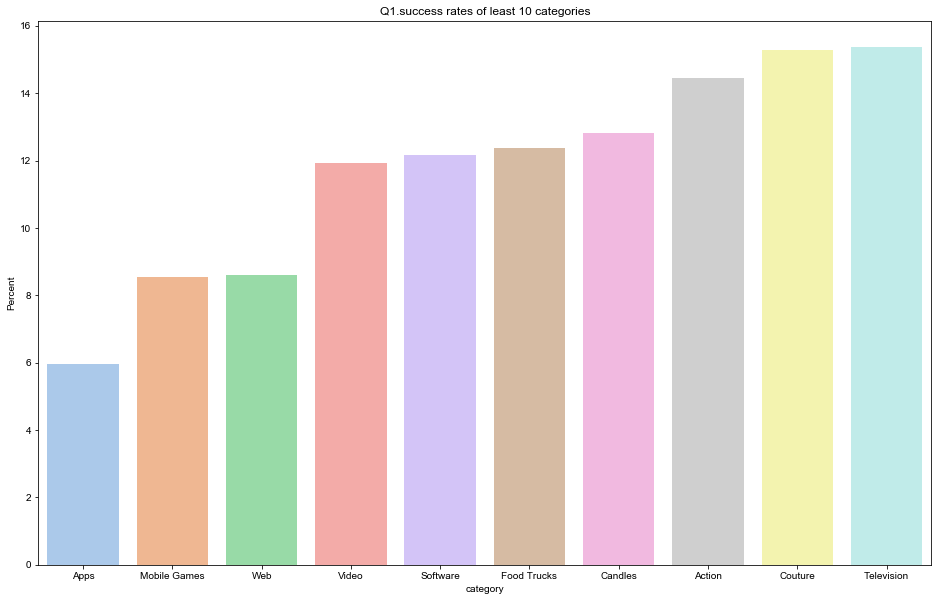

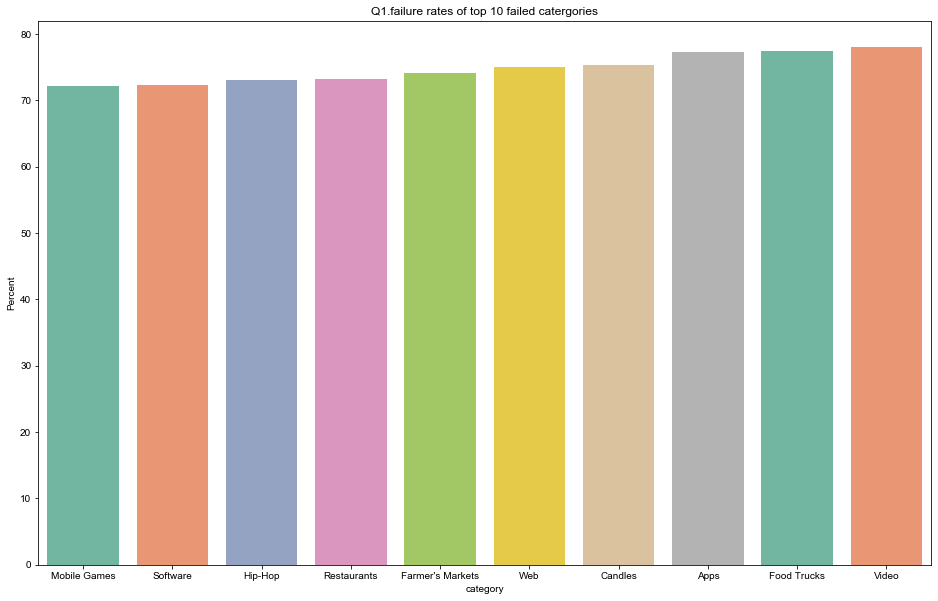

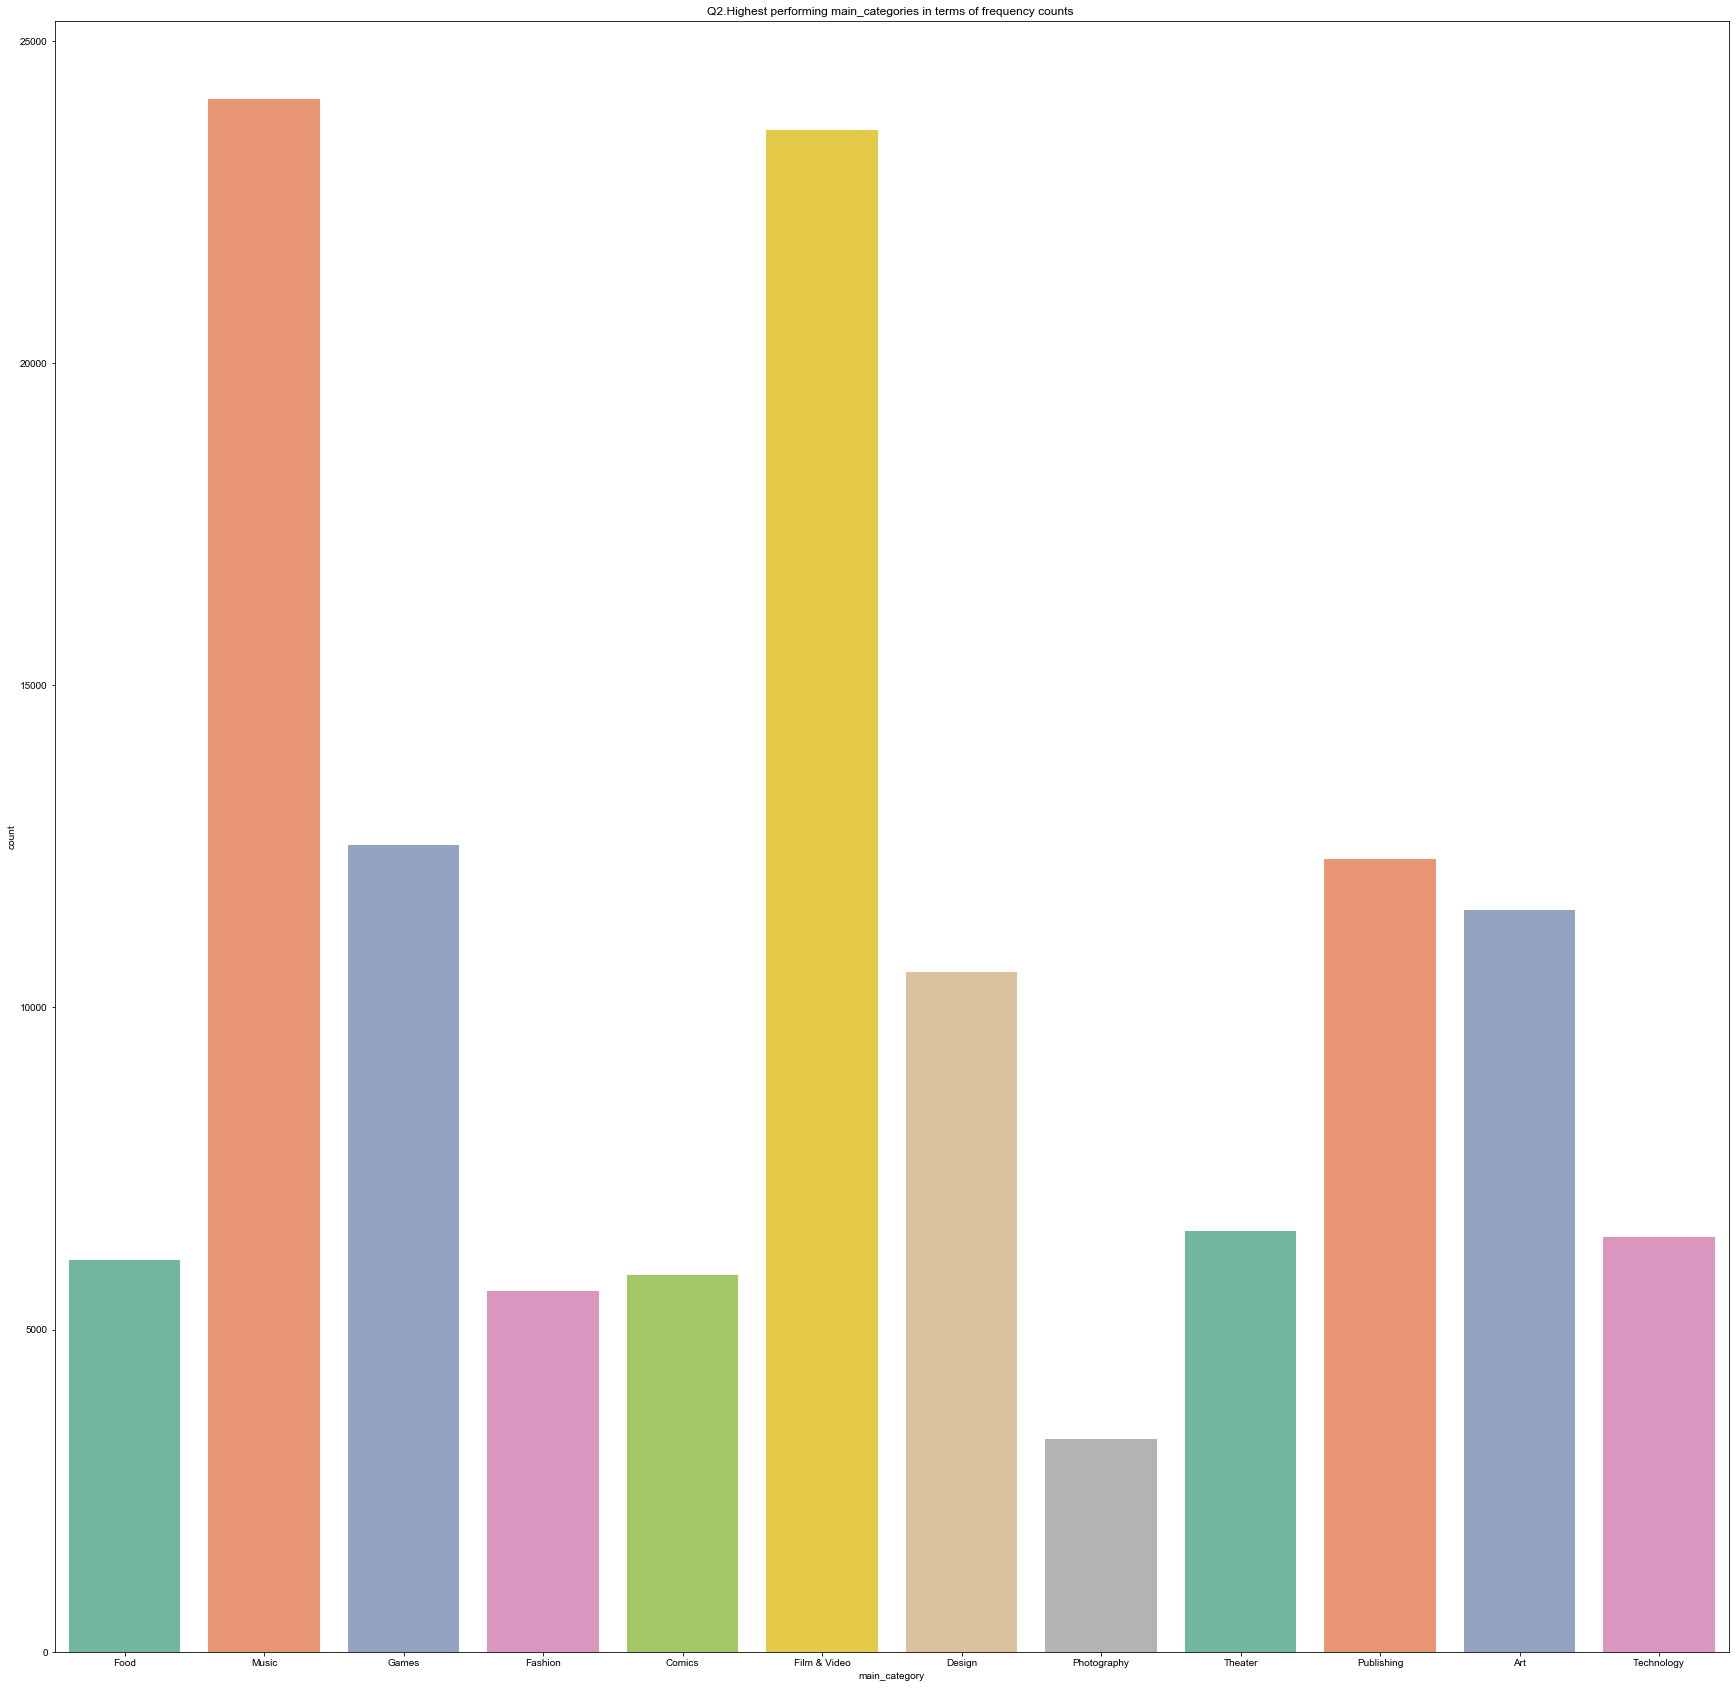

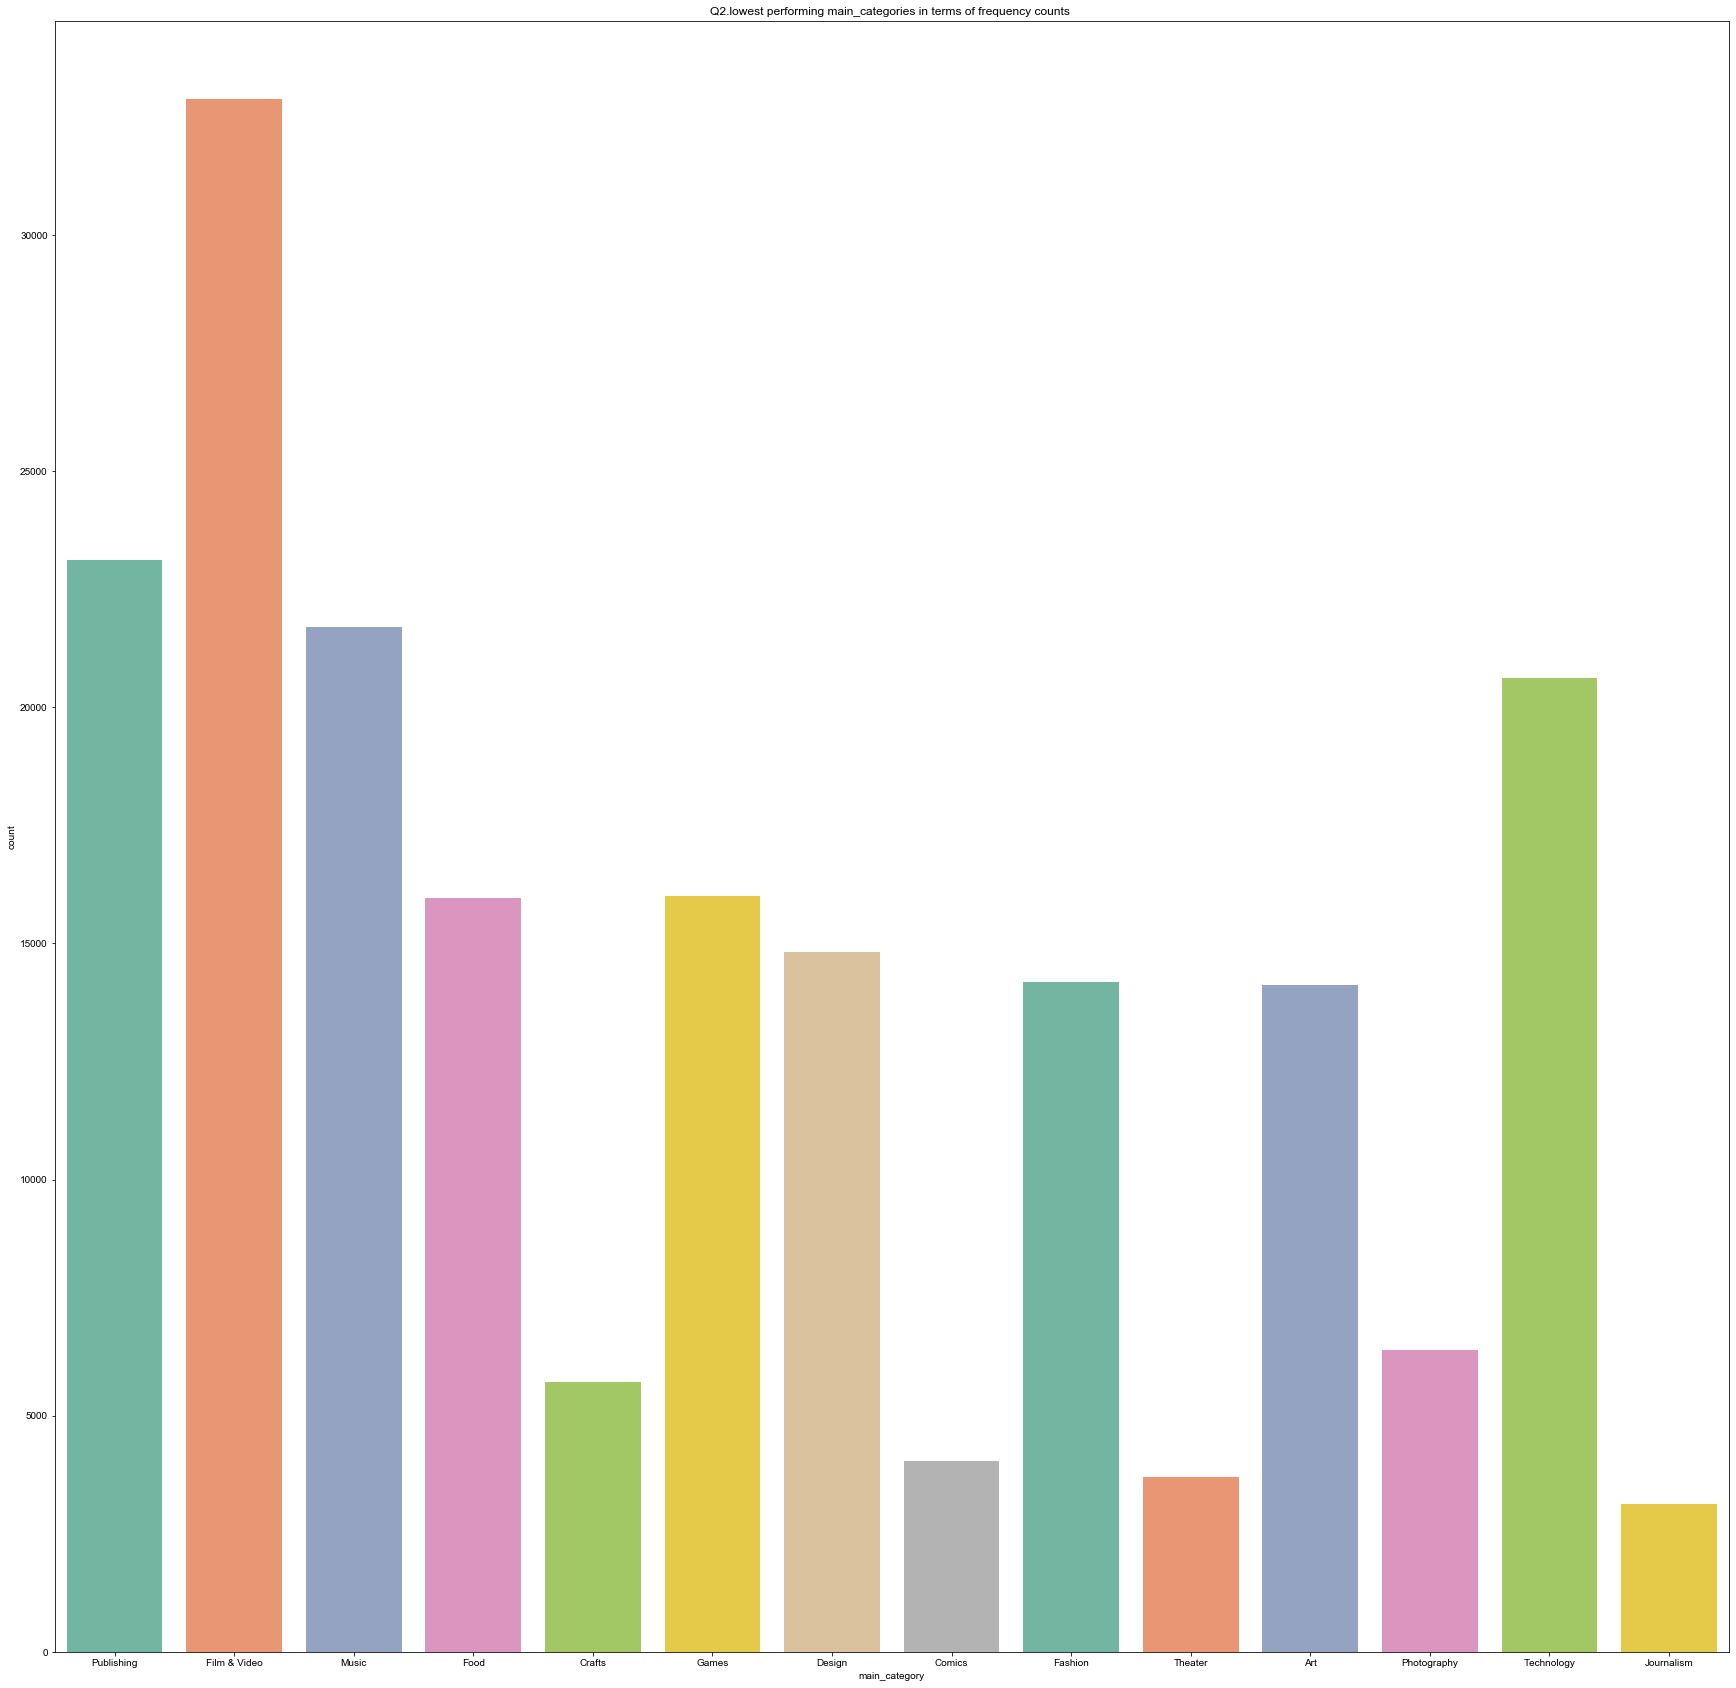

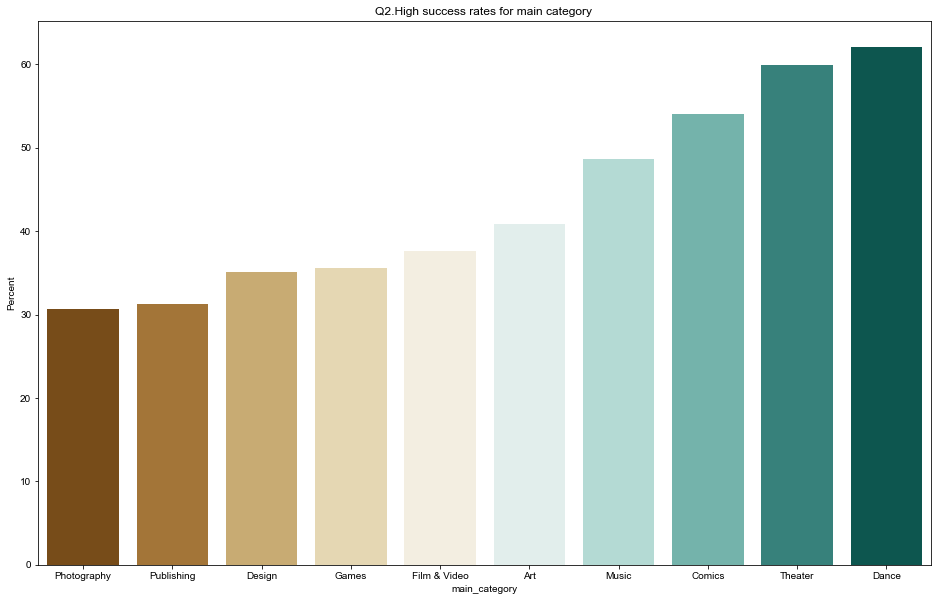

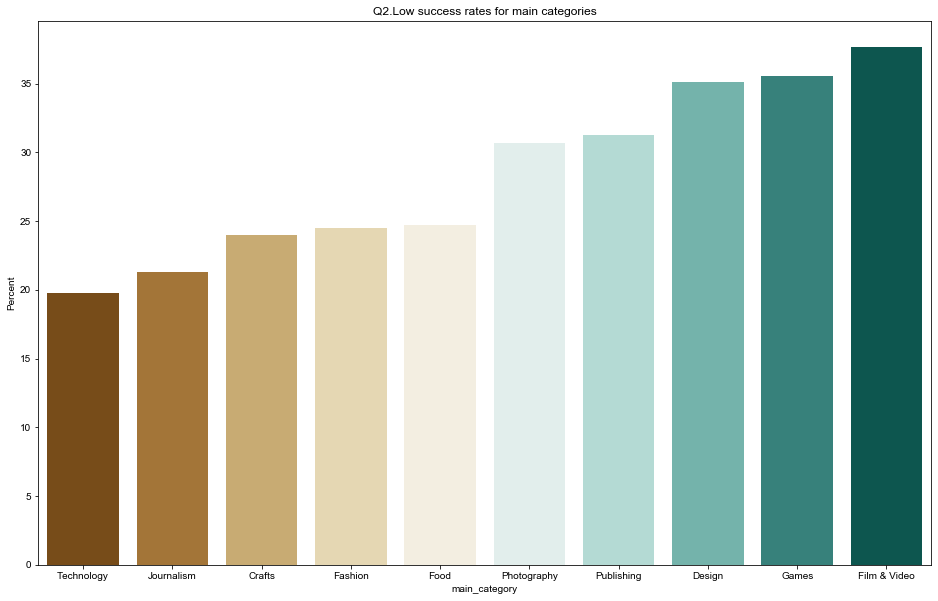

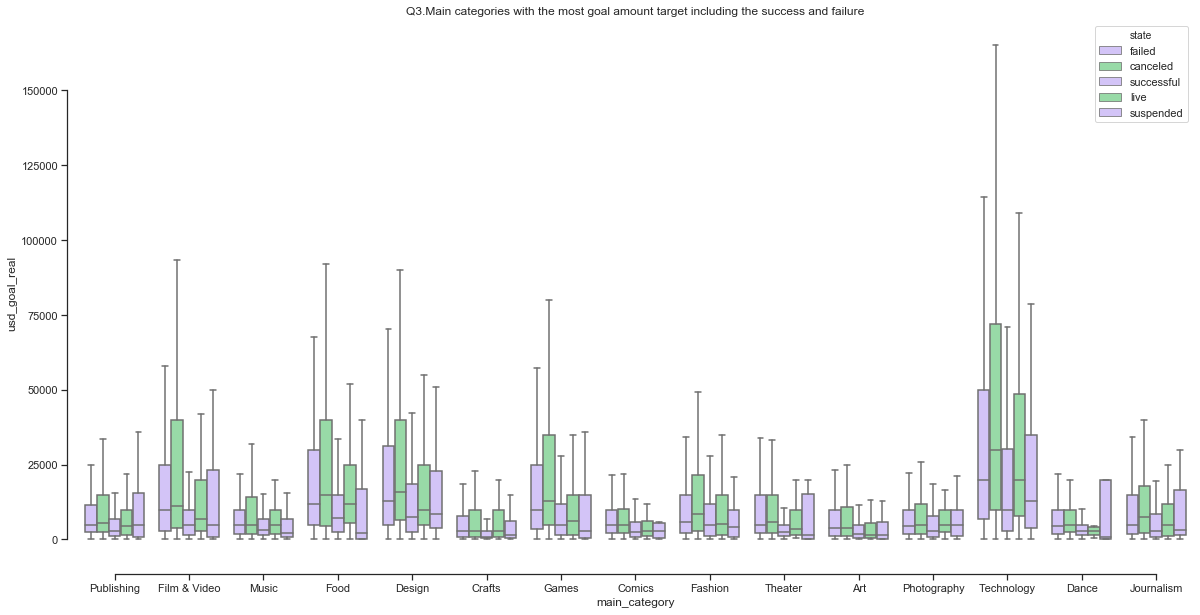

In [4]:
question_viz(kick)

##### Q4.What words were associated with kickstarter successes and fails
    

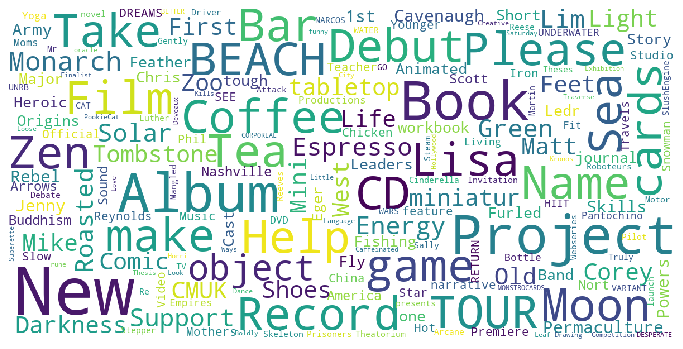

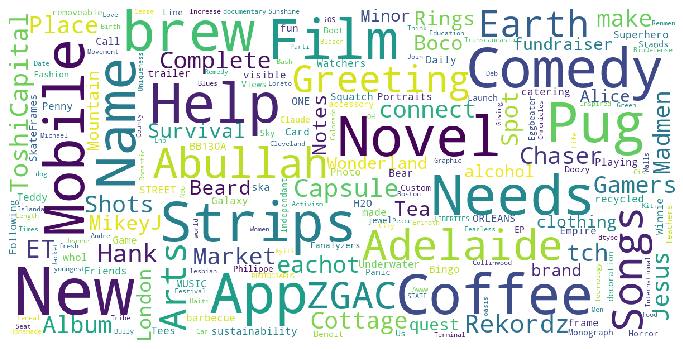



It is evident from the word cloud that the buzz words 
        for successful projects are ZEN, CD, NEW, RECORD, ALBUM


The buzzwords for failed projects is BREW, COMEDY, NOVEL, NEW , MOBILE


In [5]:
show_wordcloud(kick[kick.state == 'successful']['name'])
show_wordcloud(kick[kick.state == 'failed']['name'])
print('\n')
print("""It is evident from the word cloud that the buzz words 
        for successful projects are ZEN, CD, NEW, RECORD, ALBUM""")
print('\n')
print("""The buzzwords for failed projects is BREW, COMEDY, NOVEL, NEW , MOBILE""")

## MODELLING

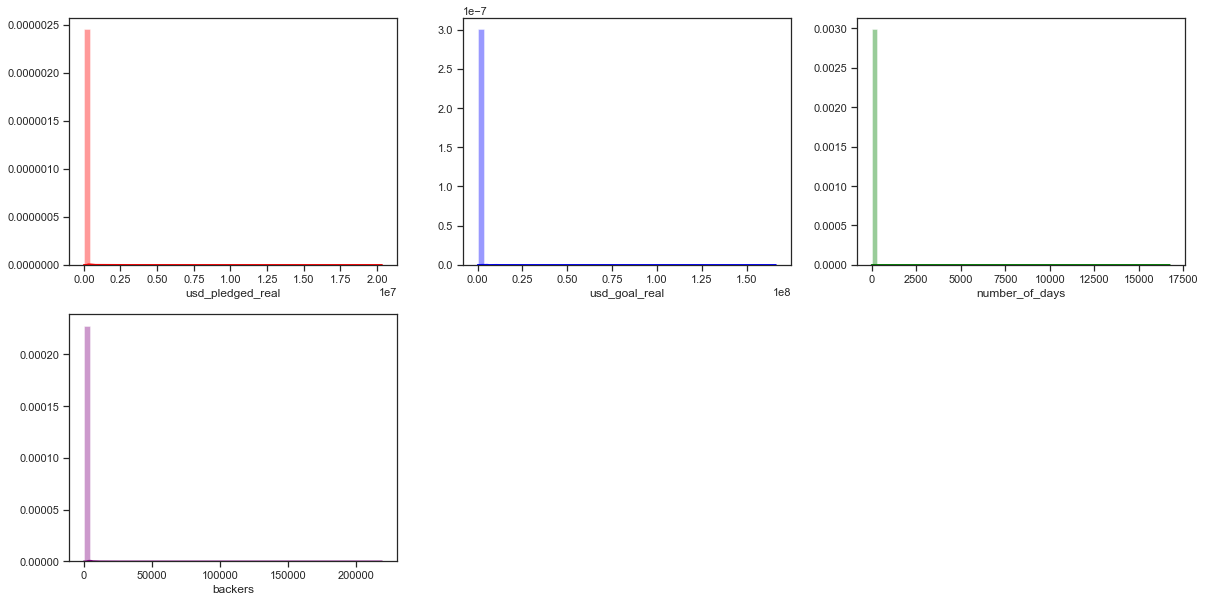

In [9]:
distribution_check(kick)

clearly from the above plot we have to log transform our continuous values for prediction We have decided to not use the varaibles - usd_pledged_real and backers as they would cause data leakage

In [10]:
log_kick = kick.loc[kick['usd_goal_real'] > 1]

In [11]:
kick['number_of_days']

0         58
1         59
2         44
3         29
4         55
5         34
6         19
7         44
8         34
9         29
10        29
11        29
12        29
13        44
14        27
15        29
16        29
17        29
18        14
19        29
20        34
21        29
22        29
23        29
24        19
25        29
26        29
27        29
28        29
29        29
          ..
378631    29
378632    29
378633    29
378634    60
378635    29
378636    29
378637    44
378638    30
378639    29
378640    33
378641    59
378642    26
378643    20
378644    21
378645    29
378646    42
378647    29
378648    29
378649    59
378650    37
378651    29
378652    29
378653    29
378654    29
378655    44
378656    29
378657    26
378658    45
378659    30
378660    27
Name: number_of_days, Length: 374860, dtype: int64